### Explore the Example Data

In [2]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

In [23]:
base_dir = os.path.join('/', 'Users', 'yjkim', 'data', 'images', 'cats_and_dogs')

In [24]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat&dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat&dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [26]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg']


In [31]:
print(f'total training cat images: {len(train_cats_fnames)}')
print(f'total training dog images:  {len(train_dogs_fnames)}')

print(f'total validation cat images: {len(os.listdir(validation_cats_dir))}')
print(f'total validation dog images:  {len(os.listdir(validation_dogs_dir))}')

total training cat images: 1000
total training dog images:  1000
total validation cat images: 500
total validation dog images:  500


In [33]:
# Paramters for graph
nrows = 4
ncols = 4

pic_index = 0    # Index for iteration over images

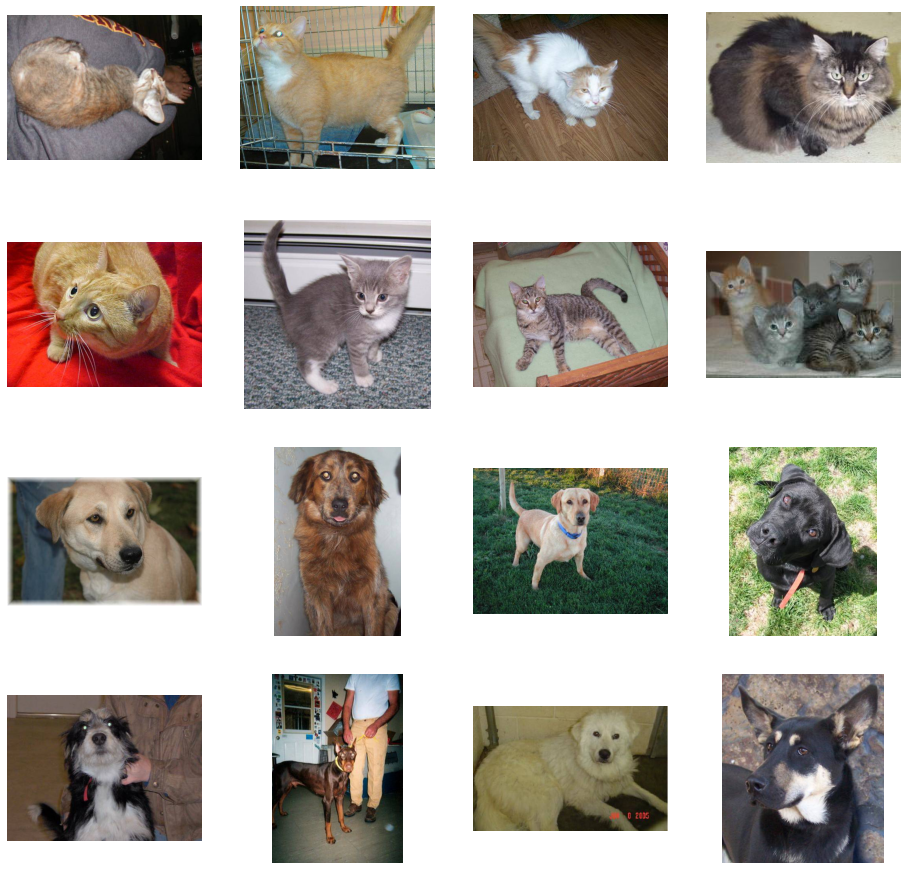

In [37]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_cat_pic = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_fnames[pic_index-8: pic_index]]
next_dog_pic = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_fnames[pic_index-8: pic_index]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')    # Don't show axes(gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

#### Build a small model from scratch

In [40]:
model = tf.keras.models.Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# Flatten the results to feed into a DNN
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [44]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Data Preprocessing

In [48]:
# All image will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

# configuration 
batch_size = 20
class_mode = 'binary'
target_size = (150, 150)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=batch_size,
                                                    class_mode=class_mode, target_size=target_size)
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=batch_size,
                                                              class_mode=class_mode, target_size=target_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Training

In [50]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2)

Epoch 1/15
100/100 - 32s - loss: 0.7510 - accuracy: 0.5440 - val_loss: 0.6705 - val_accuracy: 0.5260
Epoch 2/15
100/100 - 28s - loss: 0.6042 - accuracy: 0.6750 - val_loss: 0.6718 - val_accuracy: 0.6240
Epoch 3/15
100/100 - 30s - loss: 0.5275 - accuracy: 0.7375 - val_loss: 0.5599 - val_accuracy: 0.7160
Epoch 4/15
100/100 - 30s - loss: 0.4369 - accuracy: 0.8050 - val_loss: 0.5452 - val_accuracy: 0.7240
Epoch 5/15
100/100 - 29s - loss: 0.3609 - accuracy: 0.8320 - val_loss: 0.6208 - val_accuracy: 0.7200
Epoch 6/15
100/100 - 29s - loss: 0.2749 - accuracy: 0.8865 - val_loss: 0.7083 - val_accuracy: 0.7130
Epoch 7/15
100/100 - 29s - loss: 0.1960 - accuracy: 0.9250 - val_loss: 0.7411 - val_accuracy: 0.7450
Epoch 8/15
100/100 - 30s - loss: 0.1429 - accuracy: 0.9460 - val_loss: 0.9232 - val_accuracy: 0.7310
Epoch 9/15
100/100 - 29s - loss: 0.1007 - accuracy: 0.9600 - val_loss: 1.0054 - val_accuracy: 0.7130
Epoch 10/15
100/100 - 29s - loss: 0.0712 - accuracy: 0.9745 - val_loss: 1.1342 - val_accura

#### Visualizing Intermediate Representations

In [ ]:
# intermediate representations for all layers in the previous model after
successive_outputs = [layer.output for layer in model.layers[1:]]

# visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x = img_to_array(img)           # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)    # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        # Display the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

#### Evaluating Accuracy and Loss for the Model

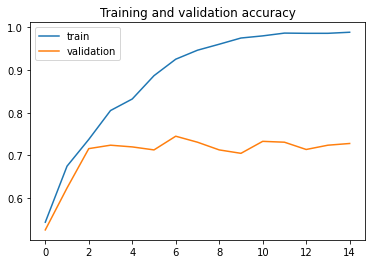

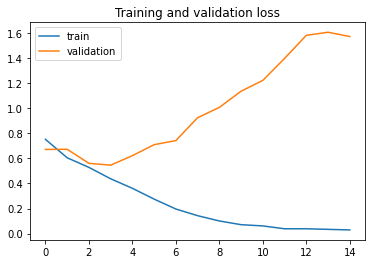

In [56]:
# Retrieve a list of list results on training and test data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='train')
plt.plot(epochs, val_loss, label='validation')
plt.title('Training and validation loss')
plt.legend()